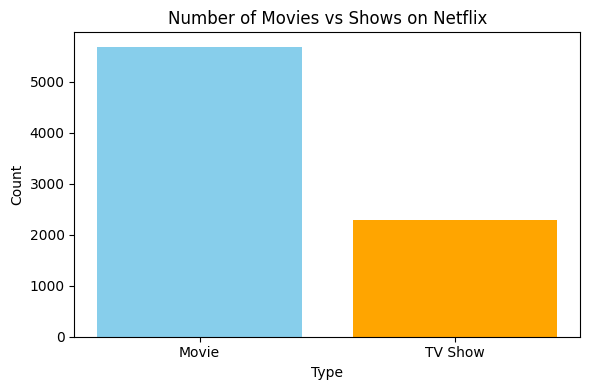

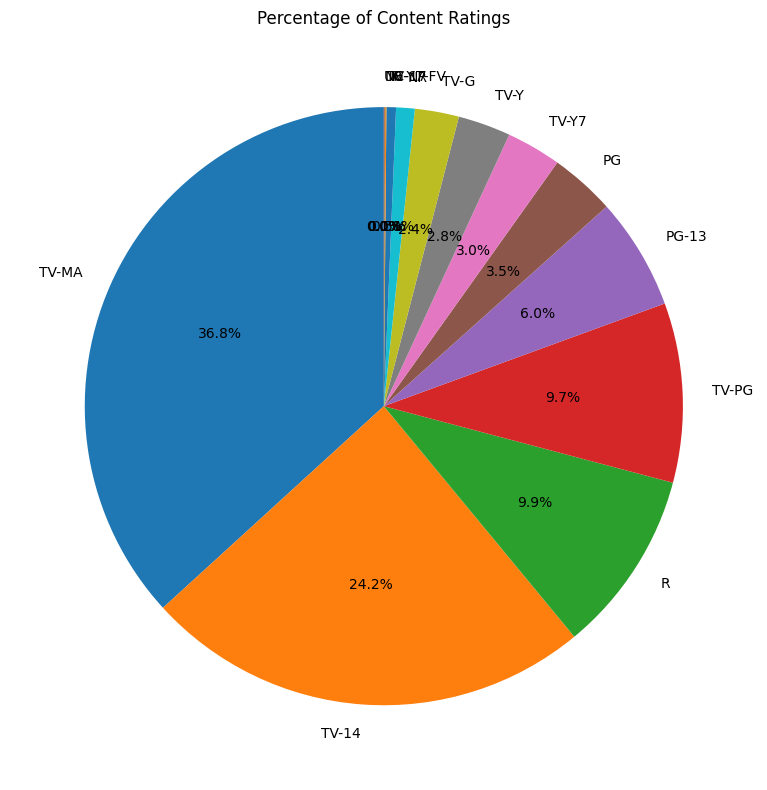

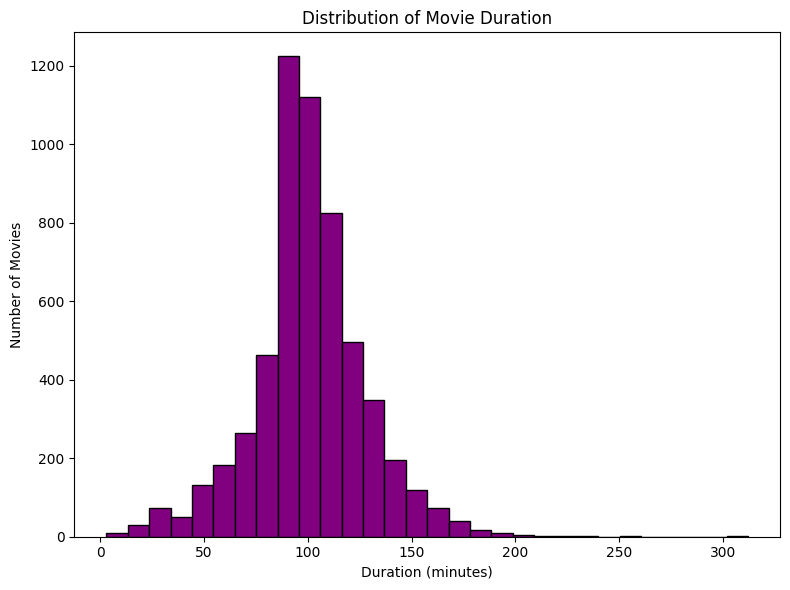

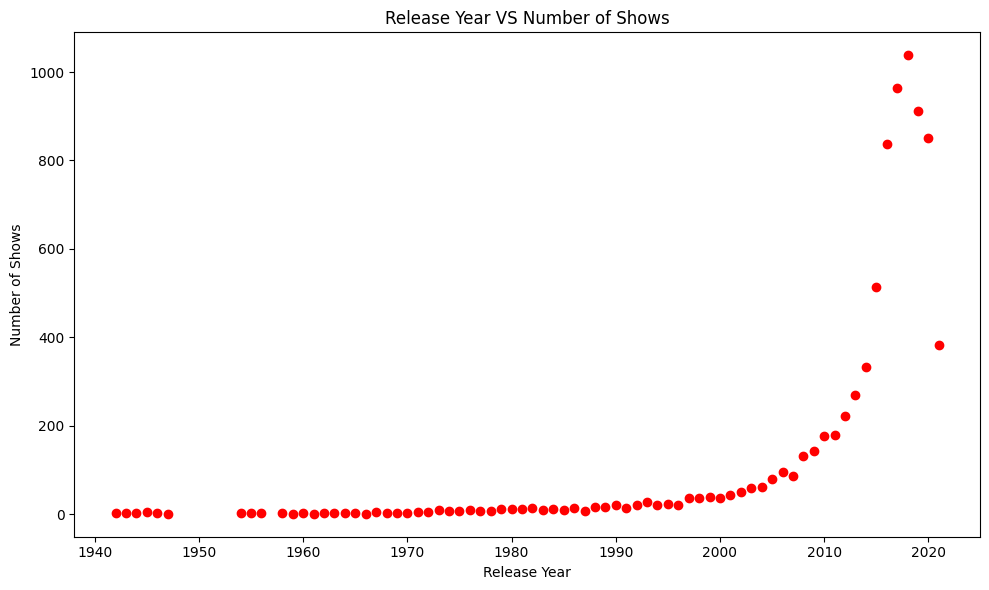

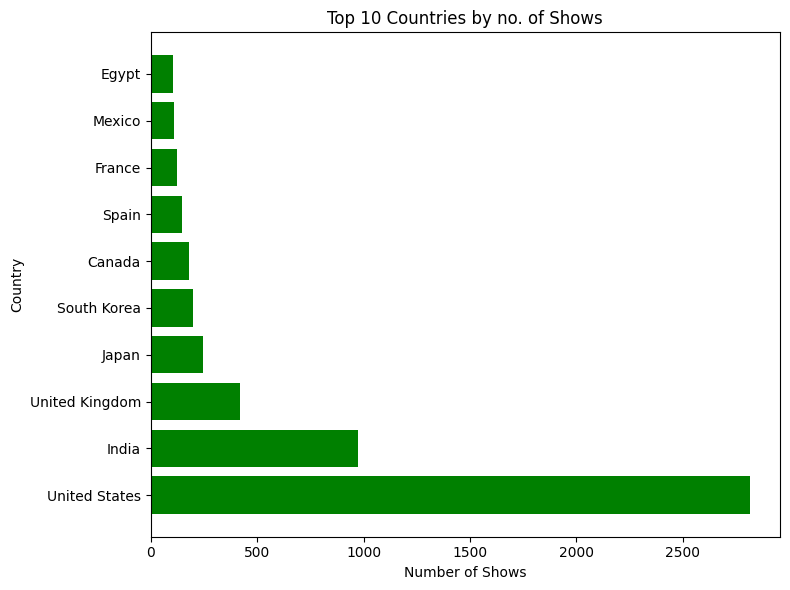

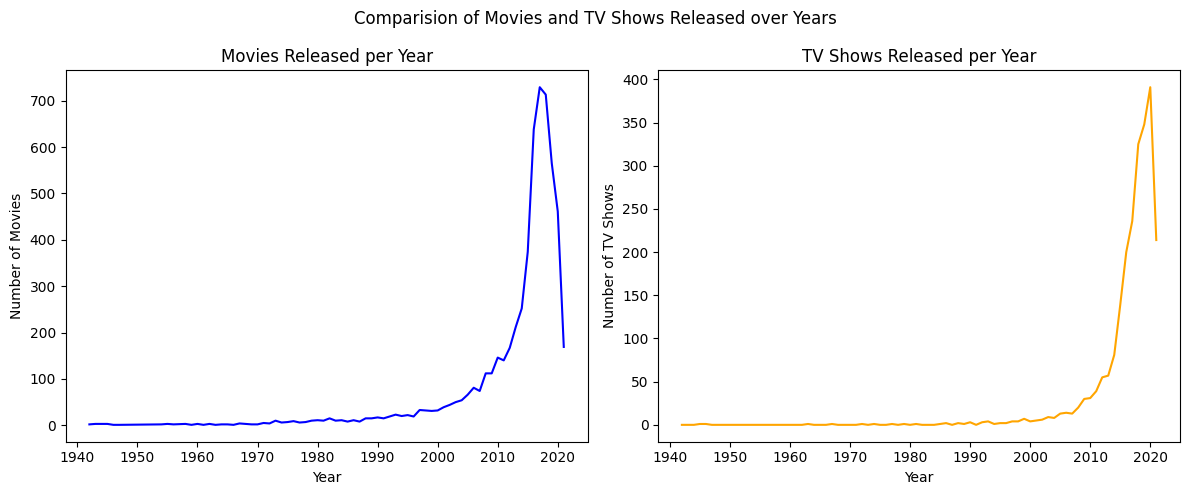

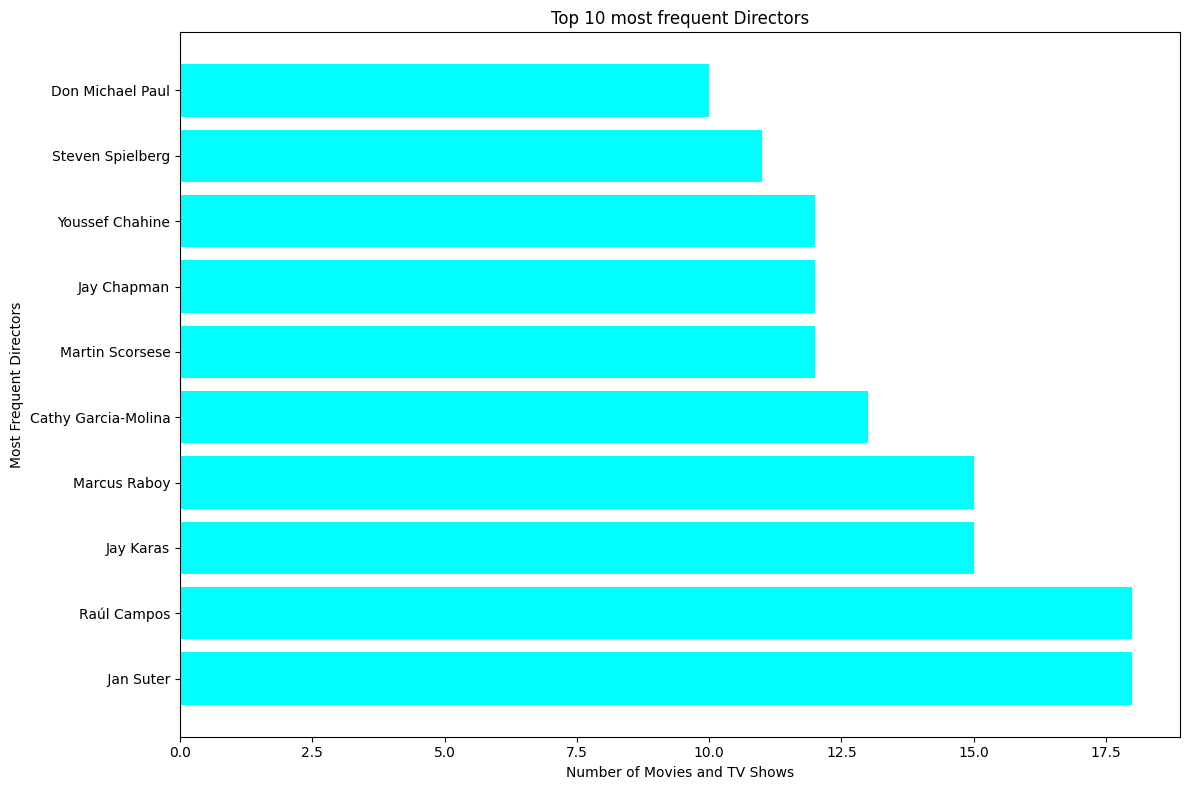

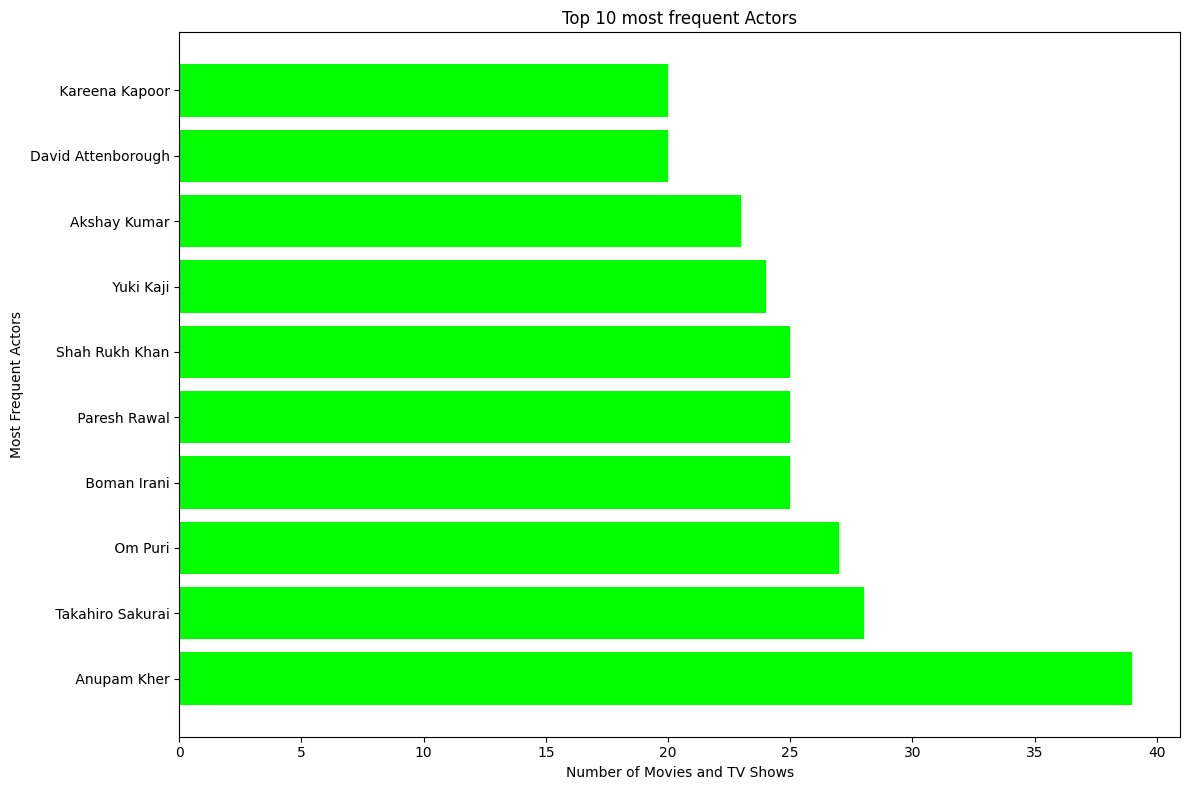

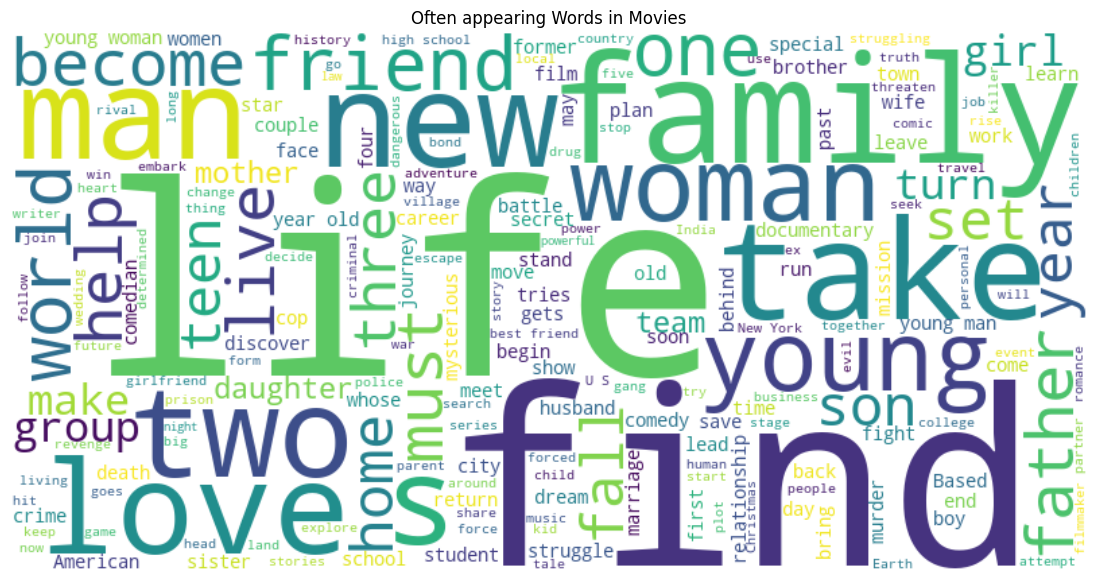

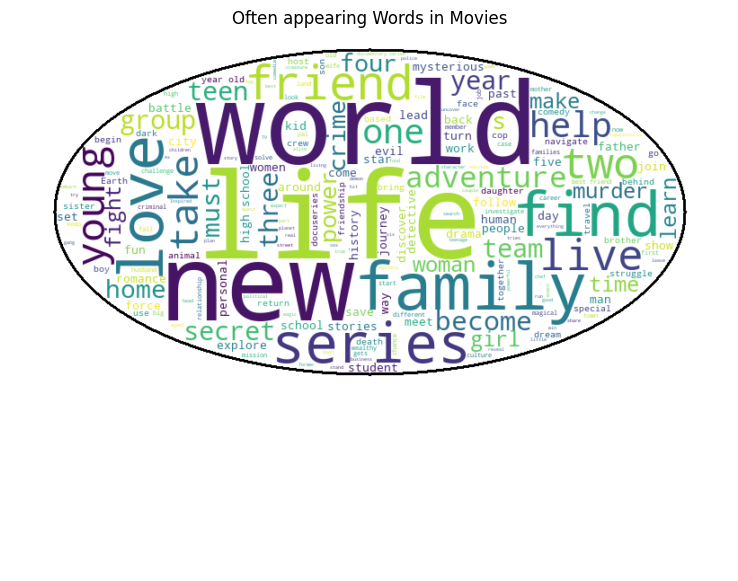

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

#load the data
df = pd.read_csv('netflix_titles.csv')

#clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies vs Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
# plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('content_ratings_pie.png')
# plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
# plt.show()

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_Scatter.png')
# plt.show()

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='green')
plt.title('Top 10 Countries by no. of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
# plt.show()

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))

#first subplot: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')
fig.suptitle('Comparision of Movies and TV Shows Released over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparision.png')
# plt.show()

directors = df['director'].dropna()
directors = directors.str.split(',')
directors = directors.explode()
directors_count = directors.value_counts().head(10)
# print(directors_count)

plt.figure(figsize=(12,8))
plt.barh(directors_count.index, directors_count.values,color='aqua')
plt.title('Top 10 most frequent Directors')
plt.xlabel('Number of Movies and TV Shows')
plt.ylabel('Most Frequent Directors')
plt.tight_layout()
plt.savefig('top10_directors.png')
plt.show()

actors = df['cast'].dropna()
actors = actors.str.split(',')
actors = actors.explode()
actors_count = actors.value_counts().head(10)
# print(actors_count)

plt.figure(figsize=(12,8))
plt.barh(actors_count.index, actors_count.values,color='lime')
plt.title('Top 10 most frequent Actors')
plt.xlabel('Number of Movies and TV Shows')
plt.ylabel('Most Frequent Actors')
plt.tight_layout()
plt.savefig('top10_actors.png')
plt.show()

# WordClouds 
# Select only movie descriptions
movie_desc = df[df['type']=='Movie']['description'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_desc)

plt.figure(figsize=(15,7))
plt.title('Often appearing Words in Movies')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_movie_description.png')
plt.show()

# Selects only TV Shows decrscriptions
shows_desc = df[df['type']=='TV Show']['description'].dropna().str.cat(sep=' ')
# Create an Ellipse
x,y = np.ogrid[:600, :800]
mask = ((x- 200)/180)**2 + ((y- 400)/350)**2 > 1
mask = 255 * mask.astype(int)
wordcloud_tv = WordCloud(width=1000, height=700, background_color='white', mask=mask,contour_color='black', contour_width = 2).generate(shows_desc)

plt.figure(figsize=(13,7))
plt.title('Often appearing Words in Movies')
plt.imshow(wordcloud_tv, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_TVshow_description.png')
plt.show()
